In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np

import datetime

sns.set(rc={'figure.facecolor':'white'})

In [2]:
ROUTE = "39"
DIRECTION = "Inbound"
MONTH = "March"

In [3]:
fnames = {
    'March': "./in-data/2022/MBTA_Bus_Arrival_Departure_Times_2022/MBTA-Bus-Arrival-Departure-Times_2022-03.csv",
}
filename = fnames[MONTH]

In [6]:
df = pd.read_csv(filename)

In [23]:
monthly = pd.read_csv(filename, parse_dates=["scheduled", "actual"])
monthly.loc[monthly.time_point_id == 'dudly', 'time_point_id'] = 'nubn'
monthly

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2022-03-01,01,Inbound,54785132.0,110,hhgat,1,Startpoint,Schedule,1900-01-01 05:05:00,1900-01-01 05:05:56,NaN,NaN
1,2022-03-01,01,Inbound,54785132.0,67,maput,2,Midpoint,Schedule,1900-01-01 05:07:00,1900-01-01 05:08:12,NaN,NaN
2,2022-03-01,01,Inbound,54785132.0,72,cntsq,3,Midpoint,Schedule,1900-01-01 05:09:00,1900-01-01 05:12:11,NaN,NaN
3,2022-03-01,01,Inbound,54785132.0,75,mit,4,Midpoint,Schedule,1900-01-01 05:11:00,1900-01-01 05:16:23,NaN,NaN
4,2022-03-01,01,Inbound,54785132.0,79,hynes,5,Midpoint,Schedule,1900-01-01 05:14:00,1900-01-01 05:20:05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499230,2022-03-31,SL5,Outbound,55113992.0,49001,Templ,1,Startpoint,Headway,1900-01-02 01:07:00,1900-01-02 01:14:52,1200.0,1621.0
2499231,2022-03-31,SL5,Outbound,55113992.0,49002,tumed,2,Midpoint,Headway,1900-01-02 01:11:00,1900-01-02 01:19:13,1200.0,1735.0
2499232,2022-03-31,SL5,Outbound,55113992.0,5098,Webrk,3,Midpoint,Headway,1900-01-02 01:13:00,1900-01-02 01:22:00,1200.0,1718.0
2499233,2022-03-31,SL5,Outbound,55113992.0,55,Wasma,4,Midpoint,Headway,1900-01-02 01:16:00,1900-01-02 01:26:46,1200.0,1732.0


In [6]:
bothdirs = monthly.loc[(monthly.route_id == ROUTE)].copy()
data = bothdirs.loc[(bothdirs.direction_id == DIRECTION)].copy()
data["bunched"] = data["headway"] < 120
data

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway,bunched
48146,2022-03-01,39,Inbound,54792201.0,10642,fhill,1,Startpoint,Schedule,1900-01-01 05:01:00,1900-01-01 05:01:13,NaN,NaN,False
48147,2022-03-01,39,Inbound,54792201.0,1128,jpctr,2,Midpoint,Schedule,1900-01-01 05:06:00,1900-01-01 05:04:36,NaN,NaN,False
48148,2022-03-01,39,Inbound,54792201.0,11131,shunt,3,Midpoint,Schedule,1900-01-01 05:08:00,1900-01-01 05:07:58,NaN,NaN,False
48149,2022-03-01,39,Inbound,54792201.0,65741,heath,4,Midpoint,Schedule,1900-01-01 05:11:00,1900-01-01 05:10:56,NaN,NaN,False
48150,2022-03-01,39,Inbound,54792241.0,10642,fhill,1,Startpoint,Headway,1900-01-01 05:13:00,1900-01-01 05:14:03,720.0,770.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458013,2022-03-31,39,Inbound,55113013.0,31317,hlong,6,Midpoint,Headway,1900-01-02 01:04:00,1900-01-02 00:56:53,780.0,630.0,False
2458014,2022-03-31,39,Inbound,55113013.0,81317,nuniv,7,Midpoint,Headway,1900-01-02 01:06:00,1900-01-02 00:58:13,780.0,591.0,False
2458015,2022-03-31,39,Inbound,55113013.0,11389,hunbv,8,Midpoint,Headway,1900-01-02 01:08:00,1900-01-02 00:59:19,780.0,530.0,False
2458016,2022-03-31,39,Inbound,55113013.0,175,copst,9,Midpoint,Headway,1900-01-02 01:10:00,1900-01-02 01:01:44,780.0,549.0,False


In [7]:
all_timepoints = data[["time_point_id", "time_point_order"]].value_counts().to_frame("counts")
filtered_timepoints = all_timepoints.loc[all_timepoints.counts > 100].groupby('time_point_id').idxmax()["counts"].tolist()
timepoints = pd.DataFrame(filtered_timepoints, columns = ["time_point_id", "time_point_order"]).sort_values(by="time_point_order").reset_index(drop=True)
order = timepoints["time_point_id"][1:-1]
timepoints

,time_point_id,time_point_order
0,fhill,1
1,jpctr,2
2,shunt,3
3,heath,4
4,brghm,5
5,hlong,6
6,nuniv,7
7,hunbv,8
8,copst,9
9,bbsta,10


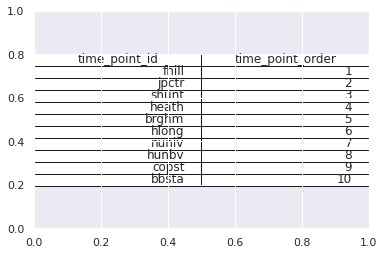

In [8]:
tbl = plt.table(cellText=[r for _, r in timepoints.iterrows()], colLabels=timepoints.columns, loc='center')

In [9]:
bunches = data.loc[data.bunched].groupby("time_point_id")["headway"].count()
all_events = data.groupby("time_point_id")["headway"].count()
metric = pd.concat([bunches, all_events], axis=1).reset_index()
metric.columns = ["time_point_id", "bunches", "total"]
metric["percent"] = metric.bunches / metric.total
metric

,time_point_id,bunches,total,percent
0,bbsta,250.0,2564,0.097504
1,brghm,240.0,2781,0.086300
2,copst,271.0,2716,0.099779
3,fhill,143.0,2520,0.056746
4,heath,218.0,2777,0.078502
5,hlong,250.0,2756,0.090711
6,hunbv,272.0,2763,0.098444
7,jpctr,158.0,2739,0.057685
8,nuniv,270.0,2757,0.097933
9,shunt,179.0,2762,0.064808


Text(0.5, 1.0, 'Bus Bunching (<2min headways) on Route 39 Inbound March 2022')

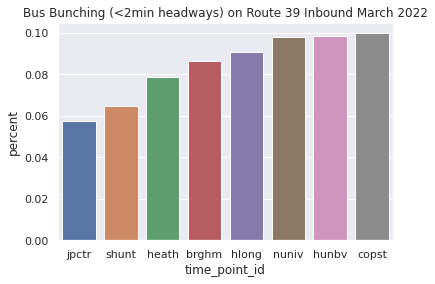

In [10]:
sns.set_style("darkgrid")
g = sns.barplot(data=metric, x="time_point_id", y="percent", order=order)
g.set_title(f"Bus Bunching (<2min headways) on Route {ROUTE} {DIRECTION} March 2022")

In [11]:
bunch_by_day = data.loc[data.bunched].groupby(["service_date", "time_point_id"])['headway'].count()
events_by_day = data.groupby(["service_date", "time_point_id"])["headway"].count()
full = pd.concat([bunch_by_day, events_by_day], axis=1).reset_index()
full.columns = ["service_date", "time_point_id", "bunches", "total"]
full["percent"] = full["bunches"] / full["total"]

full.service_date = pd.to_datetime(full.service_date)
full["week"] = full.service_date.dt.isocalendar().week
full["day"] = (full.service_date.dt.day_name())
full.loc[full.day == "Sunday", "week"] += 1
full

,service_date,time_point_id,bunches,total,percent,week,day
0,2022-03-01,bbsta,10.0,97,0.103093,9,Tuesday
1,2022-03-01,brghm,6.0,99,0.060606,9,Tuesday
2,2022-03-01,copst,12.0,100,0.120000,9,Tuesday
3,2022-03-01,fhill,3.0,74,0.040541,9,Tuesday
4,2022-03-01,heath,8.0,99,0.080808,9,Tuesday
...,...,...,...,...,...,...,...
328,2022-03-31,hunbv,11.0,103,0.106796,13,Thursday
329,2022-03-31,jpctr,9.0,100,0.090000,13,Thursday
330,2022-03-31,louis,NaN,0,NaN,13,Thursday
331,2022-03-31,nuniv,15.0,103,0.145631,13,Thursday


In [12]:
tallies = data.dropna(subset=["headway"]).pivot_table(
    values="headway", index=["service_date", "time_point_id"],
    columns=["bunched"], aggfunc="count", margins=True).reset_index()
tallies = tallies.loc[tallies.service_date != "All"]
tallies["bunches"] = tallies[True]
tallies["percent"] = tallies[True] / tallies["All"]

tallies["service_date"] = pd.to_datetime(tallies["service_date"])
tallies["week"] = tallies.service_date.dt.isocalendar().week
tallies["day"] = tallies.service_date.dt.day_name()
tallies.loc[tallies.day == "Sunday", "week"] += 1
tallies

bunched,service_date,time_point_id,False,True,All,bunches,percent,week,day
0,2022-03-01,bbsta,87.0,10.0,97,10.0,0.103093,9,Tuesday
1,2022-03-01,brghm,93.0,6.0,99,6.0,0.060606,9,Tuesday
2,2022-03-01,copst,88.0,12.0,100,12.0,0.120000,9,Tuesday
3,2022-03-01,fhill,71.0,3.0,74,3.0,0.040541,9,Tuesday
4,2022-03-01,heath,91.0,8.0,99,8.0,0.080808,9,Tuesday
...,...,...,...,...,...,...,...,...,...
305,2022-03-31,hlong,90.0,13.0,103,13.0,0.126214,13,Thursday
306,2022-03-31,hunbv,92.0,11.0,103,11.0,0.106796,13,Thursday
307,2022-03-31,jpctr,91.0,9.0,100,9.0,0.090000,13,Thursday
308,2022-03-31,nuniv,88.0,15.0,103,15.0,0.145631,13,Thursday


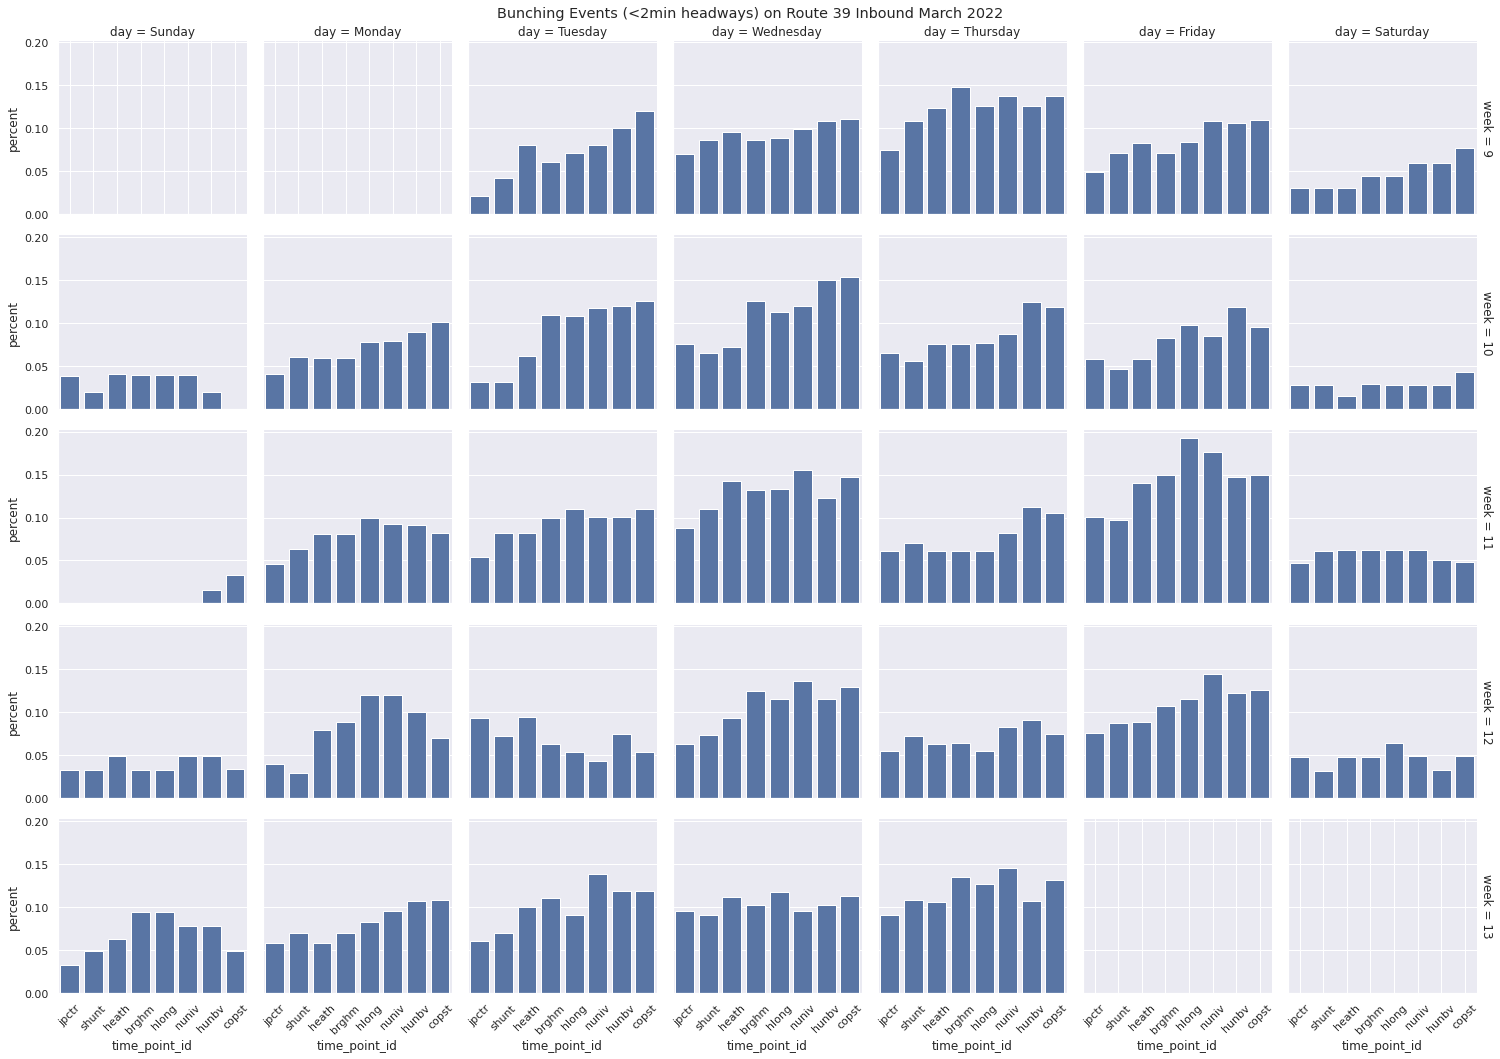

In [13]:
# sns.set(rc={'axes.facecolor':'lightblue'})
sns.set_style("darkgrid")
g = sns.FacetGrid(data=tallies, col='day', row='week', margin_titles=True,
     col_order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
g.map(sns.barplot, 'time_point_id', 'percent', order=order)
g.fig.suptitle(f"Bunching Events (<2min headways) on Route {ROUTE} {DIRECTION} March 2022")
g.set_xticklabels(rotation=45)
g.tight_layout()

<h1>Time of Day Histogram</h1>

Text(0.5, 1.0, 'Route 39 Inbound bunches (<2m headways) by hour (March)')

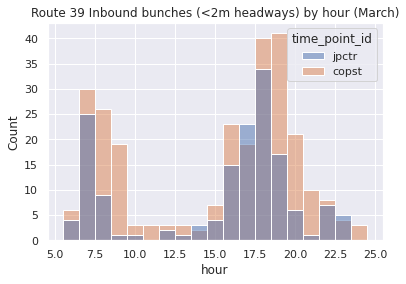

In [14]:
OFFSET = datetime.datetime(1900,1,1,0,0,0)

term, first_stop, last_stop = timepoints.time_point_id.iloc[[0,1,-2]]

data["hour"] = (data["actual"] - OFFSET).dt.round('1H').dt.total_seconds() / 3600

g = sns.histplot(data=data.loc[data.bunched & data.time_point_id.isin([first_stop, last_stop])], x='hour', binwidth=1, discrete=True, hue="time_point_id", multiple="layer", hue_order=[first_stop, last_stop])
g.set_title(f"Route {ROUTE} {DIRECTION} bunches (<2m headways) by hour ({MONTH})")

In [15]:
ofi = data.loc[data.time_point_id.isin([first_stop, last_stop])]
ofi = ofi.pivot(index=["service_date", "half_trip_id"],
                columns="time_point_id", values=["actual", "bunched"]) \
         .reset_index() \
         .rename(columns={term: "term", first_stop: "first", last_stop:"last"})
ofi["departure_hour"] = (ofi[("actual", "first")] - OFFSET) // np.timedelta64(1, 'h')

ofi = ofi.dropna().drop("actual", axis=1, level=0)
ofi

service_date half_trip_id bunched        departure_hour
time_point_id                              last  first               
0               2022-03-01   54792201.0   False  False            5.0
1               2022-03-01   54792203.0   False  False            6.0
2               2022-03-01   54792205.0   False  False            7.0
3               2022-03-01   54792209.0   False  False           16.0
4               2022-03-01   54792211.0   False  False           17.0
...                    ...          ...     ...    ...            ...
3111            2022-03-31   55113014.0   False  False           22.0
3112            2022-03-31   55113016.0   False  False           23.0
3113            2022-03-31   55113020.0   False  False           23.0
3114            2022-03-31   55113022.0   False  False           24.0
3116            2022-03-31   55113028.0   False  False           24.0

[2870 rows x 5 columns]

In [16]:
def weekdays(ds):
    from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
    holidays = calendar().holidays().date
    return (ds.dt.day_of_week < 5) & ~ds.isin(holidays)

ofi["service_date"] = pd.to_datetime(ofi.service_date)
ofi["weekday"] = weekdays(ofi.service_date)
ofi.columns = [x[1] or x[0] for x in ofi.columns]

In [17]:
ofi.loc[~ofi.weekday].service_date.value_counts()

2022-03-12    73
2022-03-05    69
2022-03-19    67
2022-03-13    67
2022-03-20    66
2022-03-26    65
2022-03-27    64
2022-03-06    57
Name: service_date, dtype: int64

In [18]:
calendar().holidays().date

NameError: name 'calendar' is not defined

In [ ]:
molten = ofi.melt(id_vars=["departure_hour", "weekday"], value_vars=["first", "last"], var_name="stop", value_name="bunched")
grouped = molten.groupby(["weekday", "departure_hour", "stop"])
totals = grouped["bunched"].count()
bunches = grouped["bunched"].sum()

final = pd.concat([totals, bunches], axis=1)
final.columns = ["total", "bunches"]
final = final.reset_index()
final["percent"] = final["bunches"] / final["total"]
final["trip_departure_hour"] = final["departure_hour"].astype(int)
# ofi.pivot_table()
# molten.pivot_table(values="bunched", index=["departure_hour", "weekday"], aggfunc="sum", columns=["stop"], margins=True)

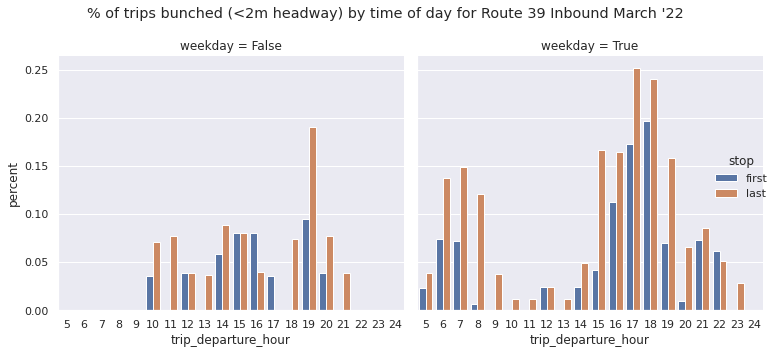

In [ ]:
g = sns.catplot(data=final, x="trip_departure_hour", y="percent", hue="stop", col="weekday", kind="bar")
g.fig.suptitle(f"% of trips bunched (<2m headway) by time of day for Route {ROUTE} {DIRECTION} March '22")
g.fig.tight_layout()
# sns.barplot(data=final.loc[final["weekday"]], x="trip_departure_hour", y="percent", hue="stop")

Text(0.5, 1.0, 'Route 39 Inbound All Trips by hour (March)')

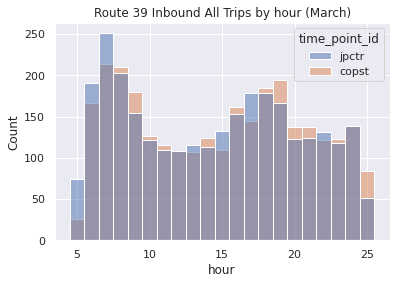

In [ ]:
g = sns.histplot(data=data.loc[data.time_point_id.isin([first_stop, last_stop])], x='hour', binwidth=1, discrete=True, hue="time_point_id", multiple="layer", hue_order=[first_stop, last_stop])
g.set_title(f"Route {ROUTE} {DIRECTION} All Trips by hour ({MONTH})")

<h1>STRINGLINES!</h1>

In [19]:
DATE = "2022-03-04"

strings = bothdirs.loc[(bothdirs.service_date == DATE) & (bothdirs.time_point_id.isin(timepoints.time_point_id))].copy()
# strings["schedule_delay"] = (strings["actual"] - strings["scheduled"]).dt.total_seconds()
strings["headway_delta"] = (strings["scheduled_headway"] - strings["headway"])
strings

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway,headway_delta
317553,2022-03-04,39,Inbound,54830661.0,10642,fhill,1,Startpoint,Schedule,1900-01-01 05:01:00,1900-01-01 05:01:22,NaN,NaN,NaN
317554,2022-03-04,39,Inbound,54830661.0,1128,jpctr,2,Midpoint,Schedule,1900-01-01 05:06:00,1900-01-01 05:04:52,NaN,NaN,NaN
317555,2022-03-04,39,Inbound,54830661.0,11131,shunt,3,Midpoint,Schedule,1900-01-01 05:08:00,1900-01-01 05:08:03,NaN,NaN,NaN
317556,2022-03-04,39,Inbound,54830661.0,65741,heath,4,Midpoint,Schedule,1900-01-01 05:11:00,1900-01-01 05:11:15,NaN,NaN,NaN
317557,2022-03-04,39,Inbound,54830704.0,10642,fhill,1,Startpoint,Headway,1900-01-01 05:13:00,1900-01-01 05:14:22,720.0,780.0,-60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319630,2022-03-04,39,Outbound,54830873.0,1363,brghm,5,Midpoint,Headway,1900-01-02 01:20:00,1900-01-02 01:39:39,840.0,1870.0,-1030.0
319631,2022-03-04,39,Outbound,54830873.0,31365,heath,6,Midpoint,Headway,1900-01-02 01:23:00,1900-01-02 01:42:42,840.0,1921.0,-1081.0
319632,2022-03-04,39,Outbound,54830873.0,1160,shunt,7,Midpoint,Headway,1900-01-02 01:26:00,1900-01-02 01:44:08,840.0,1866.0,-1026.0
319633,2022-03-04,39,Outbound,54830873.0,1939,jpctr,8,Midpoint,Headway,1900-01-02 01:29:00,1900-01-02 01:47:27,840.0,1931.0,-1091.0


In [20]:
# mean_sched_delays = strings.groupby("half_trip_id")["schedule_delay"].mean()
# strings["mean_schedule_adh"] = strings["half_trip_id"].map(mean_sched_delays)
mean_headway_delays = strings.groupby("half_trip_id")["headway_delta"].mean()
strings["mean_headway_delta"] = strings["half_trip_id"].map(mean_headway_delays)
strings

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway,headway_delta,mean_headway_delta
317553,2022-03-04,39,Inbound,54830661.0,10642,fhill,1,Startpoint,Schedule,1900-01-01 05:01:00,1900-01-01 05:01:22,NaN,NaN,NaN,NaN
317554,2022-03-04,39,Inbound,54830661.0,1128,jpctr,2,Midpoint,Schedule,1900-01-01 05:06:00,1900-01-01 05:04:52,NaN,NaN,NaN,NaN
317555,2022-03-04,39,Inbound,54830661.0,11131,shunt,3,Midpoint,Schedule,1900-01-01 05:08:00,1900-01-01 05:08:03,NaN,NaN,NaN,NaN
317556,2022-03-04,39,Inbound,54830661.0,65741,heath,4,Midpoint,Schedule,1900-01-01 05:11:00,1900-01-01 05:11:15,NaN,NaN,NaN,NaN
317557,2022-03-04,39,Inbound,54830704.0,10642,fhill,1,Startpoint,Headway,1900-01-01 05:13:00,1900-01-01 05:14:22,720.0,780.0,-60.0,52.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319630,2022-03-04,39,Outbound,54830873.0,1363,brghm,5,Midpoint,Headway,1900-01-02 01:20:00,1900-01-02 01:39:39,840.0,1870.0,-1030.0,-1070.25
319631,2022-03-04,39,Outbound,54830873.0,31365,heath,6,Midpoint,Headway,1900-01-02 01:23:00,1900-01-02 01:42:42,840.0,1921.0,-1081.0,-1070.25
319632,2022-03-04,39,Outbound,54830873.0,1160,shunt,7,Midpoint,Headway,1900-01-02 01:26:00,1900-01-02 01:44:08,840.0,1866.0,-1026.0,-1070.25
319633,2022-03-04,39,Outbound,54830873.0,1939,jpctr,8,Midpoint,Headway,1900-01-02 01:29:00,1900-01-02 01:47:27,840.0,1931.0,-1091.0,-1070.25


In [28]:
strings.loc[strings.half_trip_id == 54830661.0]

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway,headway_delta,mean_headway_delta
317553,2022-03-04,39,Inbound,54830661.0,10642,fhill,1,Startpoint,Schedule,1900-01-01 05:01:00,1900-01-01 05:01:22,NaN,NaN,NaN,NaN
317554,2022-03-04,39,Inbound,54830661.0,1128,jpctr,2,Midpoint,Schedule,1900-01-01 05:06:00,1900-01-01 05:04:52,NaN,NaN,NaN,NaN
317555,2022-03-04,39,Inbound,54830661.0,11131,shunt,3,Midpoint,Schedule,1900-01-01 05:08:00,1900-01-01 05:08:03,NaN,NaN,NaN,NaN
317556,2022-03-04,39,Inbound,54830661.0,65741,heath,4,Midpoint,Schedule,1900-01-01 05:11:00,1900-01-01 05:11:15,NaN,NaN,NaN,NaN
317558,2022-03-04,39,Inbound,54830661.0,1317,brghm,5,Midpoint,Schedule,1900-01-01 05:16:00,1900-01-01 05:14:37,NaN,NaN,NaN,NaN
317559,2022-03-04,39,Inbound,54830661.0,31317,hlong,6,Midpoint,Schedule,1900-01-01 05:18:00,1900-01-01 05:17:29,NaN,NaN,NaN,NaN
317562,2022-03-04,39,Inbound,54830661.0,81317,nuniv,7,Midpoint,Schedule,1900-01-01 05:20:00,1900-01-01 05:19:19,NaN,NaN,NaN,NaN
317563,2022-03-04,39,Inbound,54830661.0,11389,hunbv,8,Midpoint,Schedule,1900-01-01 05:22:00,1900-01-01 05:22:33,NaN,NaN,NaN,NaN
317565,2022-03-04,39,Inbound,54830661.0,175,copst,9,Midpoint,Schedule,1900-01-01 05:24:00,1900-01-01 05:24:26,NaN,NaN,NaN,NaN
317567,2022-03-04,39,Inbound,54830661.0,23391,bbsta,10,Endpoint,Schedule,1900-01-01 05:26:00,1900-01-01 05:25:27,NaN,NaN,NaN,NaN


/home/ajp1/miniconda3/envs/lab3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='headway_delta'>

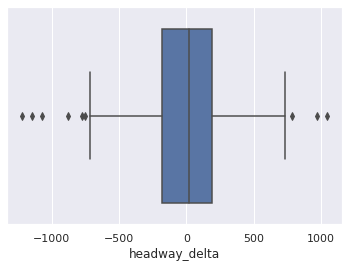

In [21]:
sns.boxplot(mean_headway_delays)

In [65]:
strings["idxs"] = strings["time_point_order"].map(lambda x: [x, x+1])
ss = strings.explode("idxs")
ss["segment_id"] = ss["half_trip_id"] + ss["idxs"] / 100
mean_hd = ss.groupby("segment_id")["headway_delta"].mean()
ss["mean_hd"] = ss["segment_id"].map(mean_hd)
ss


,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway,headway_delta,mean_headway_delta,idxs,segment_id,mean_hd
317553,2022-03-04,39,Inbound,54830661.0,10642,fhill,1,Startpoint,Schedule,1900-01-01 05:01:00,1900-01-01 05:01:22,NaN,NaN,NaN,NaN,1,54830661.01,NaN
317553,2022-03-04,39,Inbound,54830661.0,10642,fhill,1,Startpoint,Schedule,1900-01-01 05:01:00,1900-01-01 05:01:22,NaN,NaN,NaN,NaN,2,54830661.02,NaN
317554,2022-03-04,39,Inbound,54830661.0,1128,jpctr,2,Midpoint,Schedule,1900-01-01 05:06:00,1900-01-01 05:04:52,NaN,NaN,NaN,NaN,2,54830661.02,NaN
317554,2022-03-04,39,Inbound,54830661.0,1128,jpctr,2,Midpoint,Schedule,1900-01-01 05:06:00,1900-01-01 05:04:52,NaN,NaN,NaN,NaN,3,54830661.03,NaN
317555,2022-03-04,39,Inbound,54830661.0,11131,shunt,3,Midpoint,Schedule,1900-01-01 05:08:00,1900-01-01 05:08:03,NaN,NaN,NaN,NaN,3,54830661.03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319632,2022-03-04,39,Outbound,54830873.0,1160,shunt,7,Midpoint,Headway,1900-01-02 01:26:00,1900-01-02 01:44:08,840.0,1866.0,-1026.0,-1070.25,8,54830873.08,-1058.5
319633,2022-03-04,39,Outbound,54830873.0,1939,jpctr,8,Midpoint,Headway,1900-01-02 01:29:00,1900-01-02 01:47:27,840.0,1931.0,-1091.0,-1070.25,8,54830873.08,-1058.5
319633,2022-03-04,39,Outbound,54830873.0,1939,jpctr,8,Midpoint,Headway,1900-01-02 01:29:00,1900-01-02 01:47:27,840.0,1931.0,-1091.0,-1070.25,9,54830873.09,-1060.5
319634,2022-03-04,39,Outbound,54830873.0,10642,fhill,9,Endpoint,Headway,1900-01-02 01:33:00,1900-01-02 01:50:04,840.0,1870.0,-1030.0,-1070.25,9,54830873.09,-1060.5


Text(0.5, 1.0, '2022-03-04 Route 39')

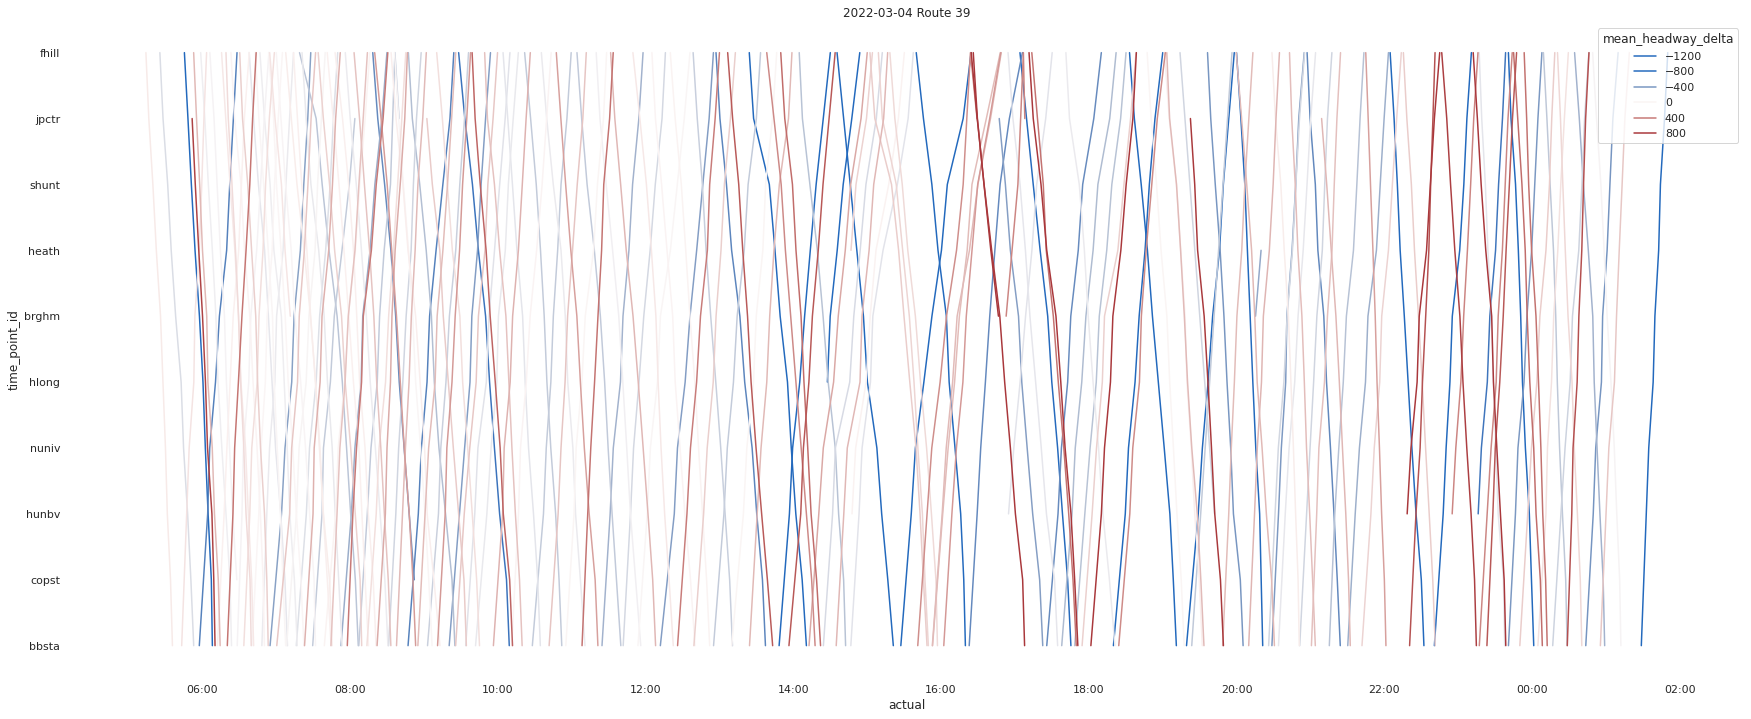

In [66]:
sns.set(rc={'axes.facecolor':'white'})
fig, ax = plt.subplots(figsize=(30,12))
xfmt = mdates.DateFormatter('%H:%M')
fig.axes[0].xaxis.set_major_formatter(xfmt)
g = sns.lineplot(data=strings,#.loc[strings.direction_id == DIRECTION],
                y='time_point_id',
                x='actual',
                hue='mean_headway_delta',
                hue_norm=(-600,600),
                palette=sns.color_palette("vlag", as_cmap=True),
                #sort=False,
                units='half_trip_id',
                estimator=None)
g.set_title(f"{DATE} Route {ROUTE}")

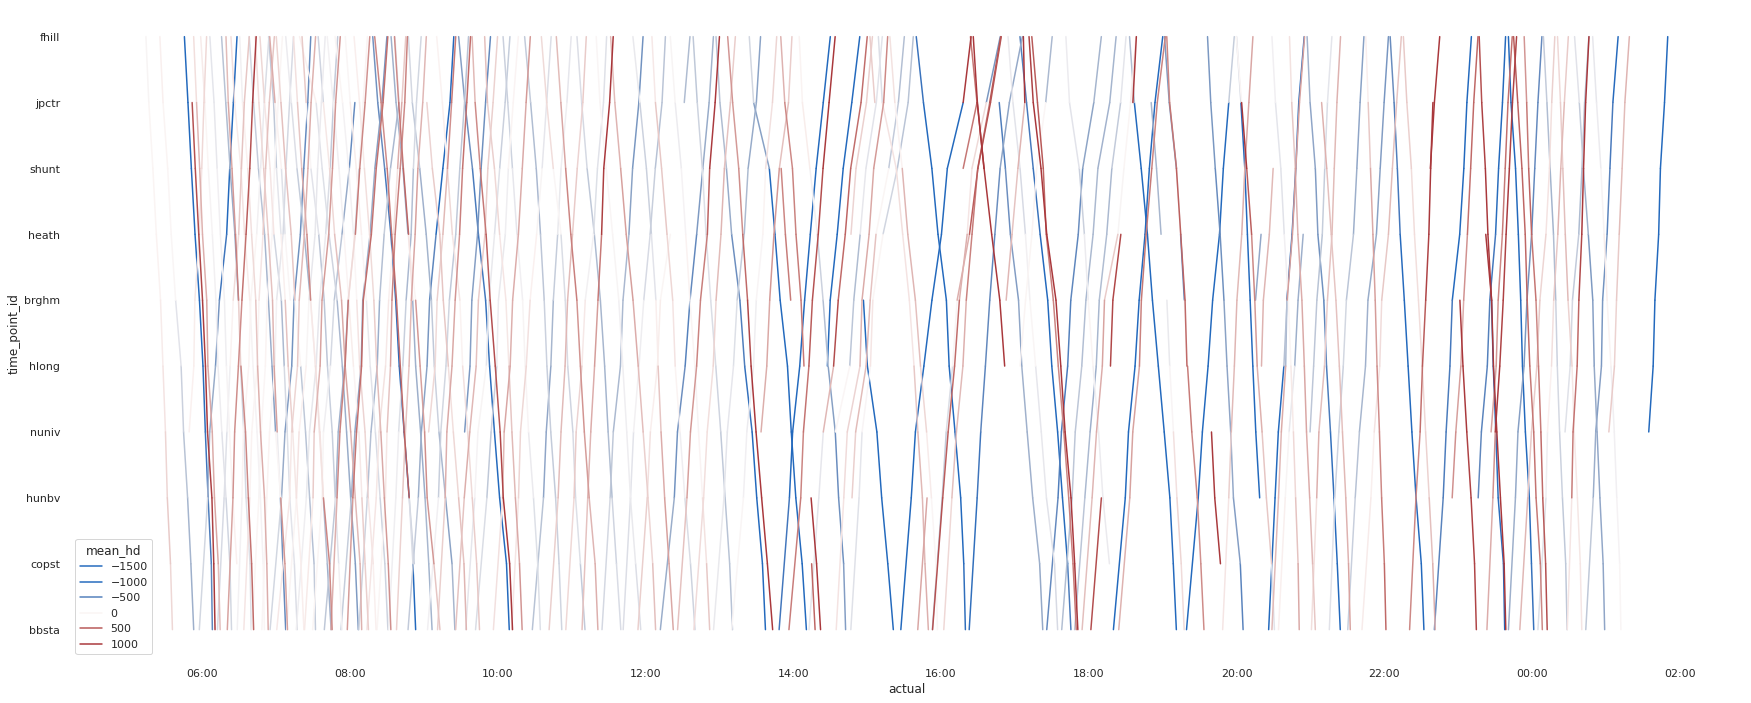

In [67]:
fig, ax = plt.subplots(figsize=(30,12))
xfmt = mdates.DateFormatter('%H:%M')
fig.axes[0].xaxis.set_major_formatter(xfmt)
g = sns.lineplot(data=ss,
                 y='time_point_id',
                 x='actual',
                 hue='mean_hd',
                 hue_norm=(-600, 600),
                 palette=sns.color_palette("vlag", as_cmap=True),
                 units="segment_id",
                 estimator=None)

In [38]:
strings.loc[strings.half_trip_id == 54830663.0]

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway,headway_delta,mean_headway_delta
317606,2022-03-04,39,Inbound,54830663.0,10642,fhill,1,Startpoint,Headway,1900-01-01 06:05:00,1900-01-01 06:06:17,360.0,447.0,-87.0,-37.333333
317614,2022-03-04,39,Inbound,54830663.0,1128,jpctr,2,Midpoint,Headway,1900-01-01 06:10:00,1900-01-01 06:09:41,360.0,449.0,-89.0,-37.333333
317617,2022-03-04,39,Inbound,54830663.0,11131,shunt,3,Midpoint,Headway,1900-01-01 06:12:00,1900-01-01 06:12:10,360.0,427.0,-67.0,-37.333333
317621,2022-03-04,39,Inbound,54830663.0,65741,heath,4,Midpoint,Headway,1900-01-01 06:15:00,1900-01-01 06:14:50,360.0,391.0,-31.0,-37.333333
317629,2022-03-04,39,Inbound,54830663.0,1317,brghm,5,Midpoint,Headway,1900-01-01 06:20:00,1900-01-01 06:18:09,360.0,417.0,-57.0,-37.333333
317633,2022-03-04,39,Inbound,54830663.0,31317,hlong,6,Midpoint,Headway,1900-01-01 06:22:00,1900-01-01 06:19:43,360.0,407.0,-47.0,-37.333333
317637,2022-03-04,39,Inbound,54830663.0,81317,nuniv,7,Midpoint,Headway,1900-01-01 06:24:00,1900-01-01 06:22:16,360.0,375.0,-15.0,-37.333333
317638,2022-03-04,39,Inbound,54830663.0,11389,hunbv,8,Midpoint,Headway,1900-01-01 06:26:00,1900-01-01 06:24:48,360.0,324.0,36.0,-37.333333
317643,2022-03-04,39,Inbound,54830663.0,175,copst,9,Midpoint,Headway,1900-01-01 06:28:00,1900-01-01 06:28:11,360.0,339.0,21.0,-37.333333
317646,2022-03-04,39,Inbound,54830663.0,23391,bbsta,10,Endpoint,Headway,1900-01-01 06:31:00,NaT,420.0,NaN,NaN,-37.333333


Text(0.5, 1.0, 'Route 1, inbound, March 2022')

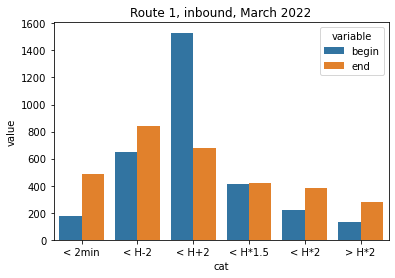

In [103]:
g = sns.barplot(data=t, x="cat", hue='variable', y='value', order=HeadwayCategories)
g.set_title("Route 1, inbound, March 2022")

In [106]:
melwa_in1.scheduled_headway.describe()

count    3554.000000
mean      626.184581
std       195.931933
min       360.000000
25%       480.000000
50%       600.000000
75%       720.000000
max      1920.000000
Name: scheduled_headway, dtype: float64

In [89]:
HeadwayCategories = pd.Categorical([
    "< 2min",
    "< H-2",
    "< H+2",
    "< H*1.5",
    "< H*2",
    "> H*2"],
    ordered=True
)
HeadwayCategories

['< 2min', '< H-2', '< H+2', '< H*1.5', '< H*2', '> H*2']
Categories (6, object): ['< 2min' < '< H*1.5' < '< H*2' < '< H+2' < '< H-2' < '> H*2']

In [90]:
def calc_headway_category(row):
    val = row['headway']
    H = row['scheduled_headway']
    if val < 120:
        return HeadwayCategories[0]
    elif val < H - 120:
        return HeadwayCategories[1]
    elif val < H + 120:
        return HeadwayCategories[2]
    elif val < H*1.5:
        return HeadwayCategories[3]
    elif val < H*2:
        return HeadwayCategories[4]
    else:
        return HeadwayCategories[5]